# 1) Step 1 : EDA :

# Exploratey data analysis :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pandas.plotting import scatter_matrix

In [3]:
#loading dataset
df_car = pd.read_csv("/content/CarPrice_Assignment.csv")
df_car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1


**there are :**
*   26 columns in our data
*   205 rows
*   no-null cells



In [5]:
#total rows and columns dataset
df_car.shape

(205, 26)

In [6]:
df_car.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [7]:
df_car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**we have outliers in:**
-------mean-------median-
1.   price    ===>  13276.7   ===  10295
2.  peakrpm   ===>  5125.1   ===  5200
3.  horsepower===>  104.1     ===   95
4.  enginesize===>  126.9    ===  120
5.  curbweight===>  2555.5    ===  2414






In [8]:
df_car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**there is no null cells**

In [9]:
def data_info(data):
    cols = data.columns
    unique_values = [data[col].value_counts().head(10).index.to_array()for col in cols]
    n_uniques = [data[col].nunique() for col in cols]
    dtypes = [data[col].dtype for col in cols]
    nulss = [data[col].isnull().sum() for col in cols]
    dup = [data.duplicated().sum() for col in cols]
    return pd.DataFrame({"col":cols,"dtype":dtypes,"n_uniques":n_uniques,"n_nan":nulss,"unique_val":unique_values,"duplicated":dup})

In [10]:
df_car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [11]:
df_car["symboling"].value_counts().head().index.to_numpy()

array([ 0,  1,  2,  3, -1])

In [12]:
df_car["fueltype"].value_counts().head().index.to_numpy()

array(['gas', 'diesel'], dtype=object)

In [13]:
df_car["aspiration"].value_counts().head().index.to_numpy()

array(['std', 'turbo'], dtype=object)

In [14]:
df_car["doornumber"].value_counts().head().index.to_numpy()

array(['four', 'two'], dtype=object)

In [15]:
df_car["carbody"].value_counts().head().index.to_numpy()

array(['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible'],
      dtype=object)

In [16]:
df_car["drivewheel"].value_counts().head().index.to_numpy()

array(['fwd', 'rwd', '4wd'], dtype=object)

In [17]:
df_car["enginelocation"].value_counts().head().index.to_numpy()

array(['front', 'rear'], dtype=object)

In [18]:
df_car["wheelbase"].value_counts().head().index.to_numpy()

array([94.5, 93.7, 95.7, 96.5, 97.3])

In [19]:
df_car["carlength"].value_counts().head().index.to_numpy()

array([157.3, 188.8, 171.7, 186.7, 166.3])

In [20]:
df_car["carwidth"].value_counts().head().index.to_numpy()

array([63.8, 66.5, 65.4, 63.6, 64.4])

In [21]:
df_car["carheight"].value_counts().head().index.to_numpy()

array([50.8, 52. , 55.7, 54.1, 54.5])

In [22]:
df_car["curbweight"].value_counts().head().index.to_numpy()

array([2385, 1918, 2275, 1989, 2410])

In [23]:
df_car["enginetype"].value_counts().head().index.to_numpy()

array(['ohc', 'ohcf', 'ohcv', 'dohc', 'l'], dtype=object)

In [24]:
df_car["cylindernumber"].value_counts().head().index.to_numpy()

array(['four', 'six', 'five', 'eight', 'two'], dtype=object)

In [25]:
df_car["enginesize"].value_counts().head().index.to_numpy()

array([122,  92,  97,  98, 108])

In [26]:
df_car["fuelsystem"].value_counts().head().index.to_numpy()

array(['mpfi', '2bbl', 'idi', '1bbl', 'spdi'], dtype=object)

In [27]:
df_car["boreratio"].value_counts().head().index.to_numpy()

array([3.62, 3.19, 3.15, 3.03, 2.97])

In [28]:
df_car["stroke"].value_counts().head().index.to_numpy()

array([3.4 , 3.23, 3.15, 3.03, 3.39])

In [29]:
df_car["compressionratio"].value_counts().head().index.to_numpy()

array([9. , 9.4, 8.5, 9.5, 9.3])

In [30]:
df_car["horsepower"].value_counts().head().index.to_numpy()

array([ 68,  70,  69, 116, 110])

In [31]:
df_car["peakrpm"].value_counts().head().index.to_numpy()

array([5500, 4800, 5000, 5200, 5400])

In [32]:
df_car["citympg"].value_counts().head().index.to_numpy()

array([31, 19, 24, 27, 17])

In [33]:
df_car["highwaympg"].value_counts().head().index.to_numpy()

array([25, 38, 24, 30, 32])

In [34]:
df_car["price"].value_counts().head().index.to_numpy()

array([8921. , 9279. , 7898. , 8916.5, 7775. ])

the **categorical** columns that we have :


*   symboling
*   carname
*   fueltype
*   aspiration
*   doonnumber
*   carbody
*   drivewheel
*   enginelocation
*   enginetype
*   cylindernumber
*   fuelsystem


the **numerical** columns that we have :


*   weelbase
*   carlength
*   carwidth
*   carheight
*   curbweight
*   enginesize
*   boreratio
*   stroke
*   compressionratio
*   horsepower
*   peakrpm
*   citympg
*   highwaympg
*   price

# categorical features in car price data

In [35]:
def categorical_plot(data, columns, numbers_of_cat_value):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize = (20 , 5 * total_rows))
    plot_index = 1
    for column in columns:
      if len(data[column].unique()) < numbers_of_cat_value:
          plt.subplot(total_rows , total_cols , plot_index)
          sns.countplot(x=data[column], palette="rocket", hue=data[column])
          plt.title(f"count plot of {column}")
          plot_index += 1
      else:
           print(f"column '{column}' is not categorical.")
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

column 'car_ID' is not categorical.
column 'CarName' is not categorical.
column 'wheelbase' is not categorical.
column 'carlength' is not categorical.
column 'carwidth' is not categorical.
column 'carheight' is not categorical.
column 'curbweight' is not categorical.
column 'enginesize' is not categorical.
column 'boreratio' is not categorical.
column 'stroke' is not categorical.
column 'compressionratio' is not categorical.
column 'horsepower' is not categorical.
column 'peakrpm' is not categorical.
column 'citympg' is not categorical.
column 'highwaympg' is not categorical.
column 'price' is not categorical.


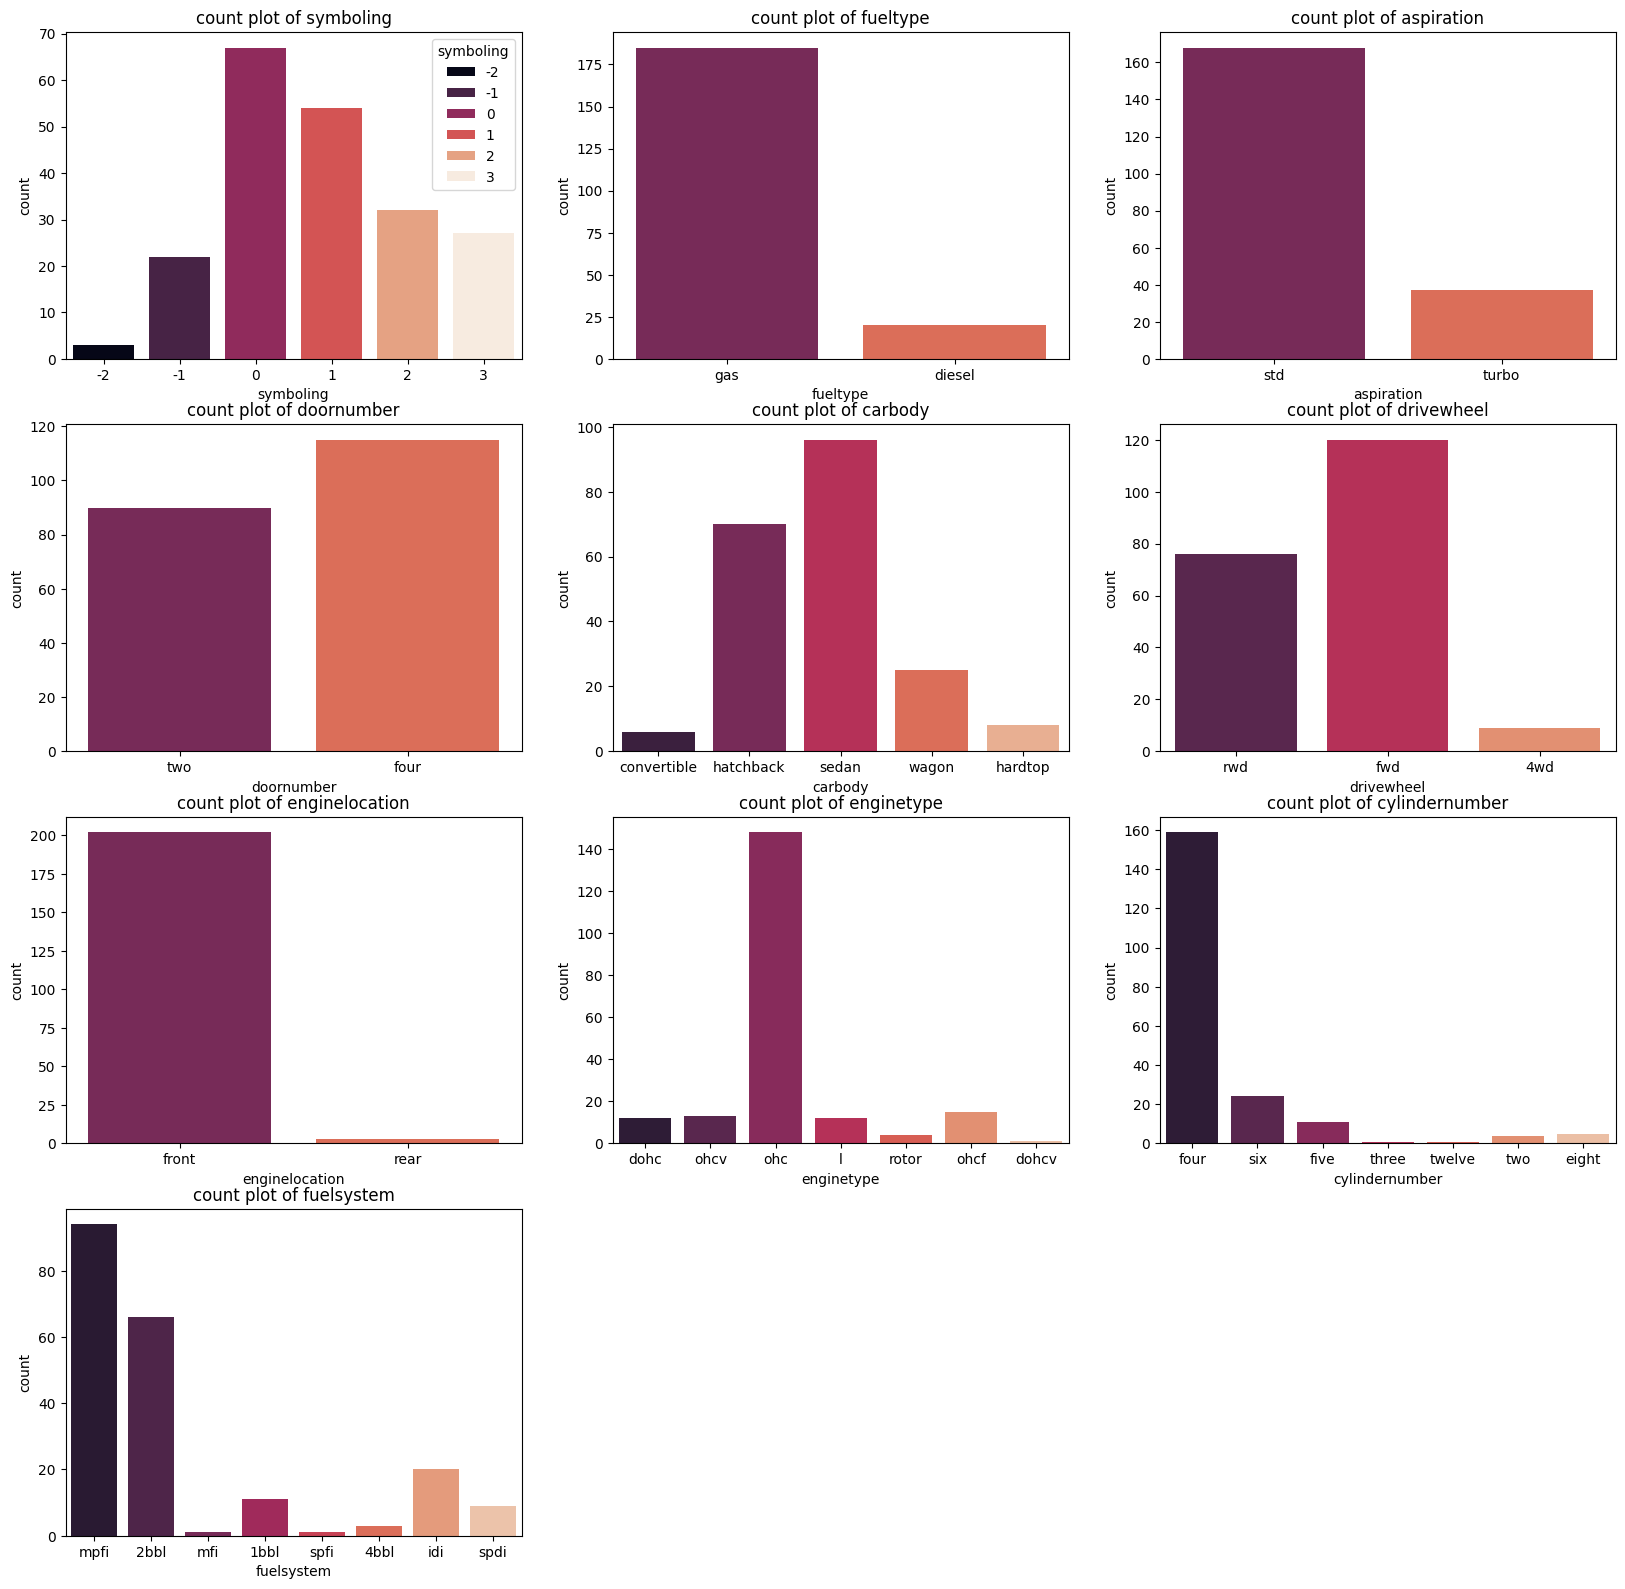

In [36]:
categorical_plot(df_car, df_car.columns, 10)



*   The people who are in danger are between ( the zero stage : 35%, the first stage : 30%, the second stage : 15%, the third stage : 10% ), and the higher the stage, the greater the risk, and it is considered one of the most dangerous stages. They are the second and third stages.
(These percentages are approximate percentages)
*   we have more than 85% using the Gas.
*   we have more than 75% using the "std" spiration.
*   60% of people they like to buy four-door cars.
*   The sedan and hatchback car are the best-selling of all cars.
*   The best-selling of the cars in the weel drive is the "fwd" then "rwd".
*   more than of 95% of cars are used "front" engine.
*   The most common type of engine used in cars is "ohc".
*   The most common number of cylinder used in cars is "four".
*   The most two common types used in the gas system are "mpfi" and "2bbl".

# continuous features in car price data

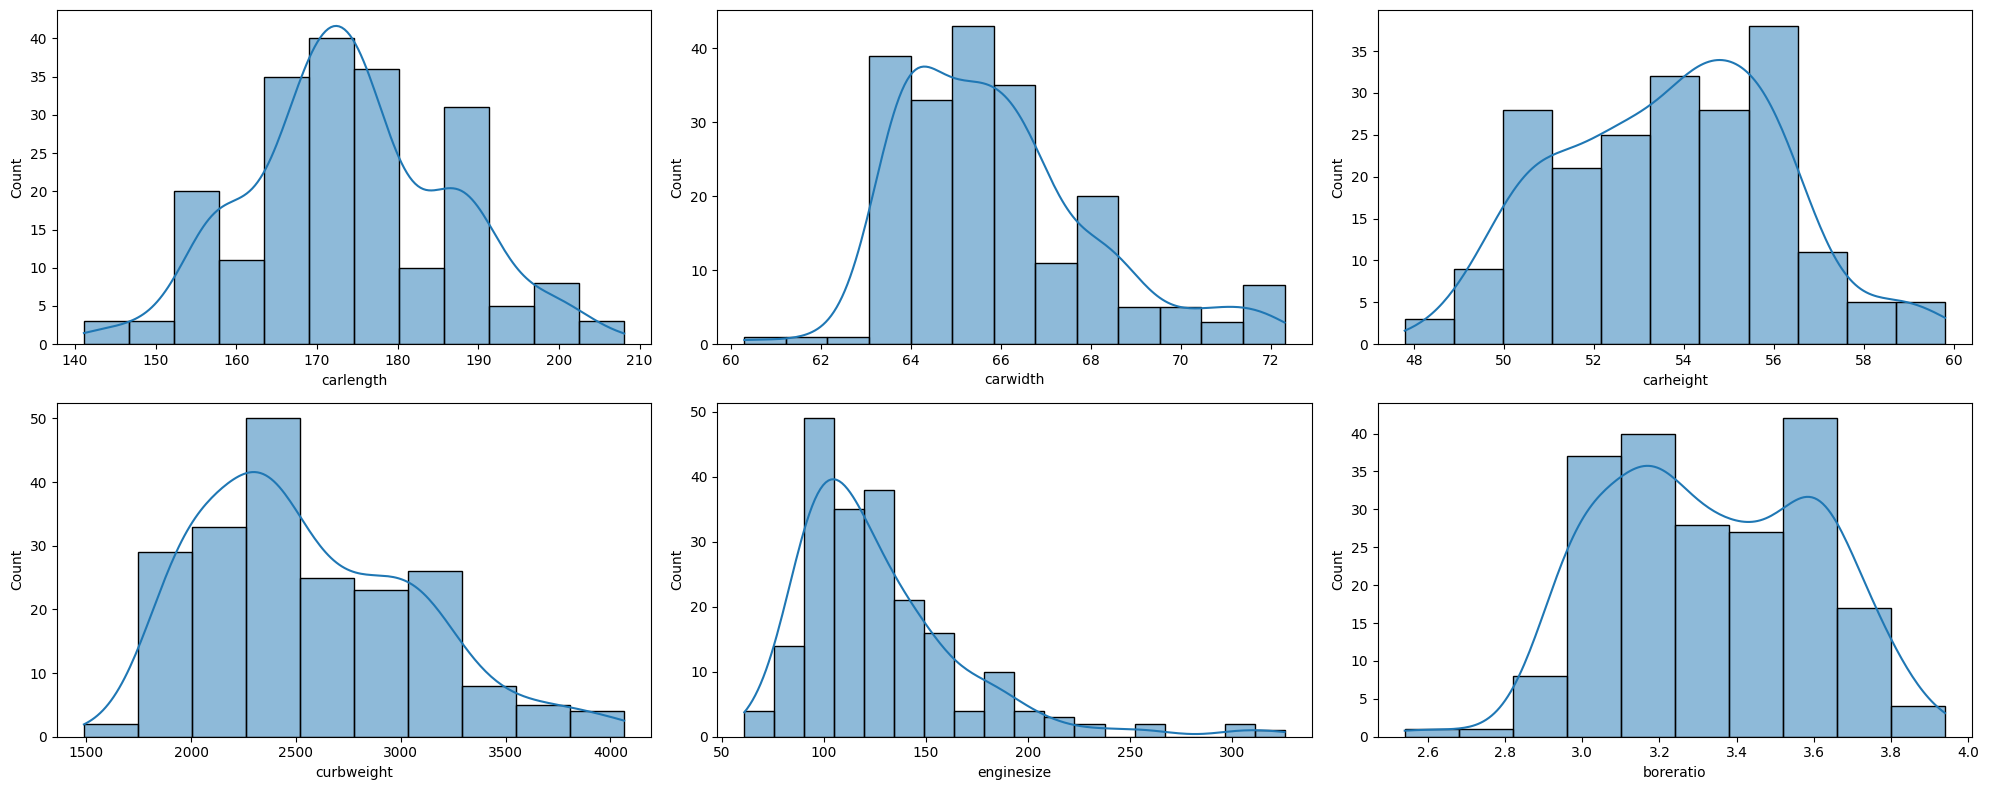

In [37]:
continuous_features = ["carlength","carwidth","carheight","curbweight","enginesize","boreratio"]
plt.figure(figsize=(20,8))
for i in range(len(continuous_features)):
    plt.subplot(2 , 3 , i + 1)
    sns.histplot(df_car[continuous_features[i]],kde=True)
plt.tight_layout()
plt.show()

**so that the continuous_features that we have are : carlenght - carwidth - carheight - curbheight - boreratio .**
*   the most carlenght used is between ( 165 - 190 )
*   the most carwidht used is between ( 64 - 66 )
*   the most carheight used is between ( 50 - 56 )
*   the most curbweight used is between ( 2000 - 3000 )
*   the most enginesize used is between ( 80 - 150 )
*   the most boreratio used is between ( 3.0 - 3.6 )

In [38]:
df_car.skew(numeric_only = True)

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

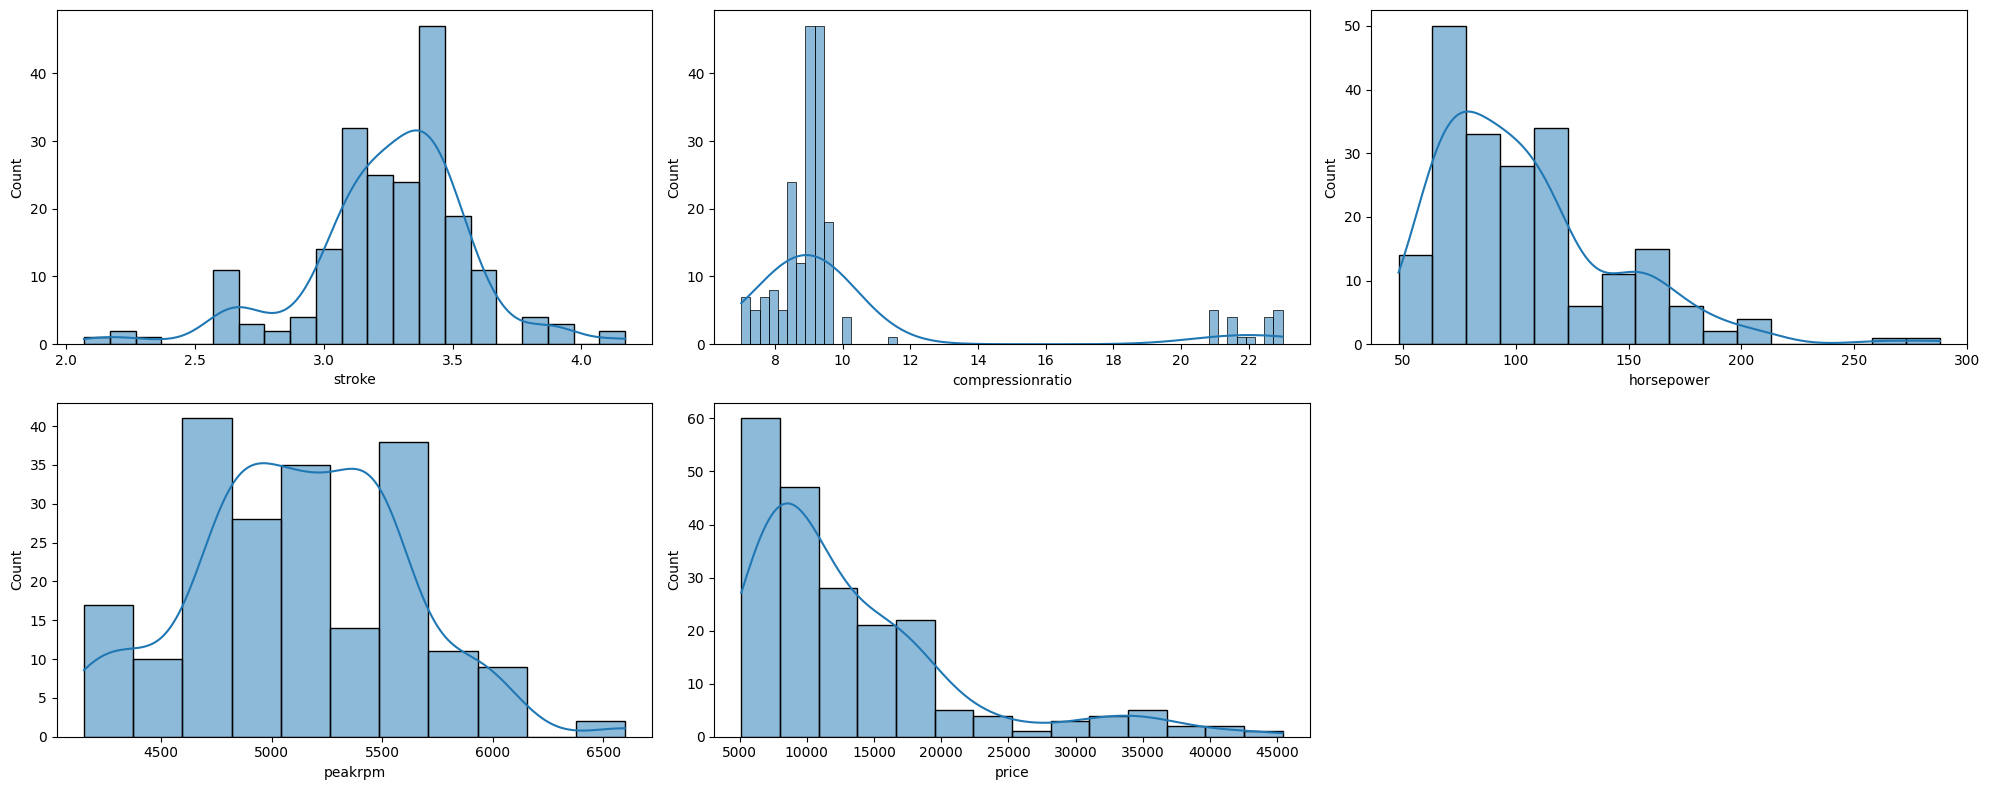

In [39]:
cont_features = ["stroke","compressionratio","horsepower","peakrpm","price"]
plt.figure(figsize=(20,8))
for i in range(len(cont_features)):
    plt.subplot(2 , 3 , i + 1)
    sns.histplot(df_car[cont_features[i]],kde=True)
plt.tight_layout()
plt.show()

*   **horsepower and price are right skew.**

In [40]:
df_car.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

*  **the car_ID column is a unique column**

*   **the CarName also has 147 unique row.**
*   **curbweight has 171 unique row.**



In [41]:
def categorical_plot_target(data , columns , target):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize = (20 , 5 * total_rows))
    plot_index = 1
    for column in columns:
        if  data[column].nunique() < 10:
            plt.subplot(total_rows , total_cols , plot_index)
            sns.countplot(x = data[column] , palette = "rocket" , hue = data [target])
            plt.title(f"count plot of {column} with symboling")
            plot_index += 1
        else:
            print(f"column '{column}' is not categorical.")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

column 'car_ID' is not categorical.
column 'CarName' is not categorical.
column 'wheelbase' is not categorical.
column 'carlength' is not categorical.
column 'carwidth' is not categorical.
column 'carheight' is not categorical.
column 'curbweight' is not categorical.
column 'enginesize' is not categorical.
column 'boreratio' is not categorical.
column 'stroke' is not categorical.
column 'compressionratio' is not categorical.
column 'horsepower' is not categorical.
column 'peakrpm' is not categorical.
column 'citympg' is not categorical.
column 'highwaympg' is not categorical.
column 'price' is not categorical.


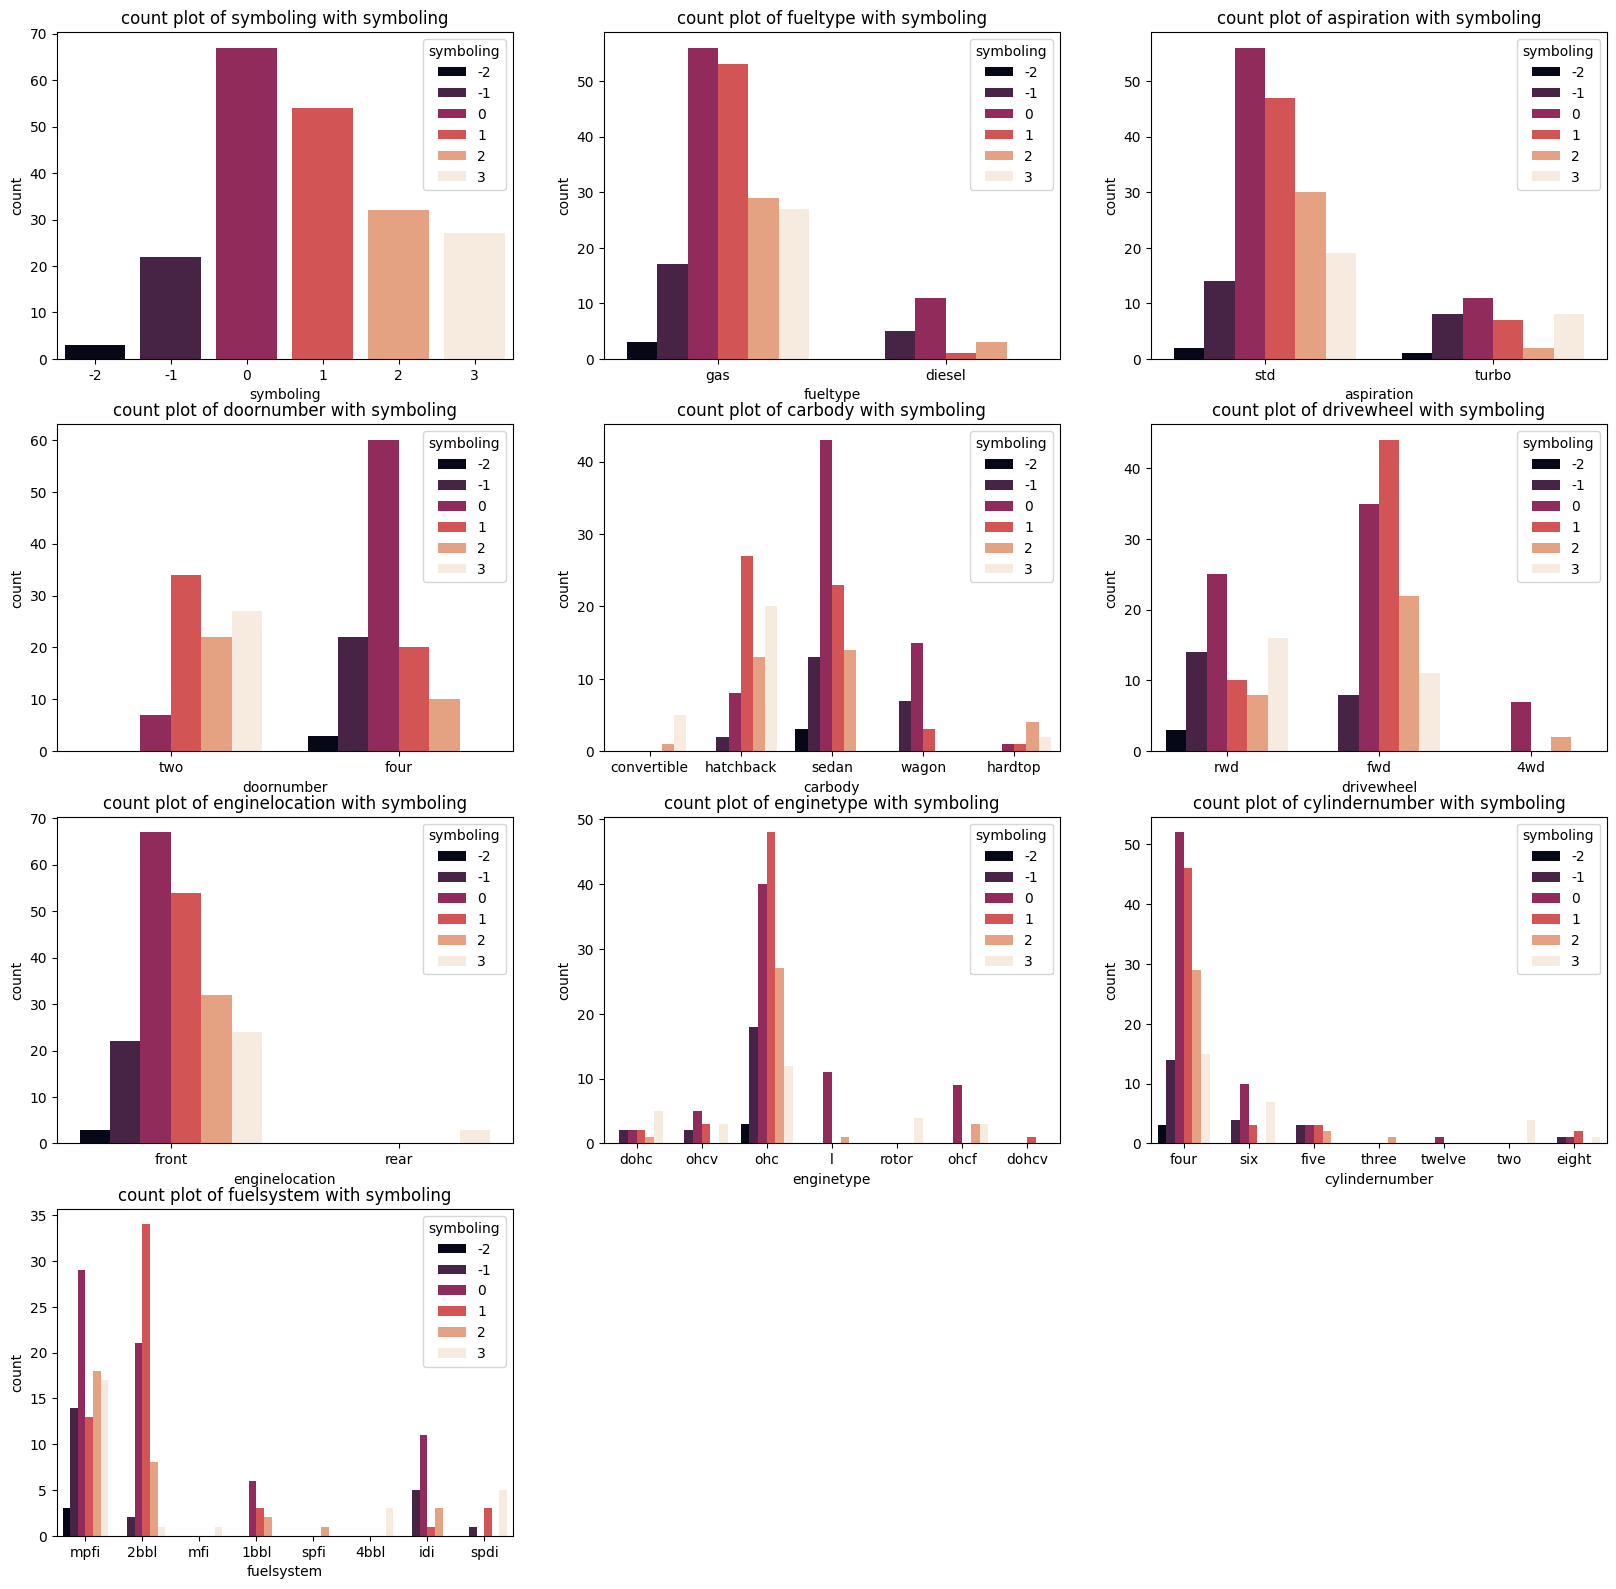

In [42]:
categorical_plot_target(df_car,df_car.columns,"symboling")

**there are alot of points we should pay attention to :**      


*   People who use "diesel" , their lives are not at risk as is the case with "gas" .
*   Cars with "turbo" siparetion is more risky than the one with "std"
*   Cars with "two-doors" is more risky than the one with "four-doors"
*   The safest car body types among all our types that we have it :

                                  1.   sedan
                                  2.   wegon
*   Cars with "rwd" is more risky than those with "fwd" & "4wd" , and the most safty one is "4wd".
*   The location engine at the "front" is the best.
*   The best engine type are :    
                                  1.   ohc
                                  2.   l
                                  3.   ohcf
*   The best cylinder engine are :   
                                  1.  four
                                  2.  five
                                  3.  twelve
*   The best fuel systems are :    
                                  1.   2bbl
                                  2.   lbbl
                                  3.   idi







# Correlation

In [43]:
df_car.corr(numeric_only=True)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


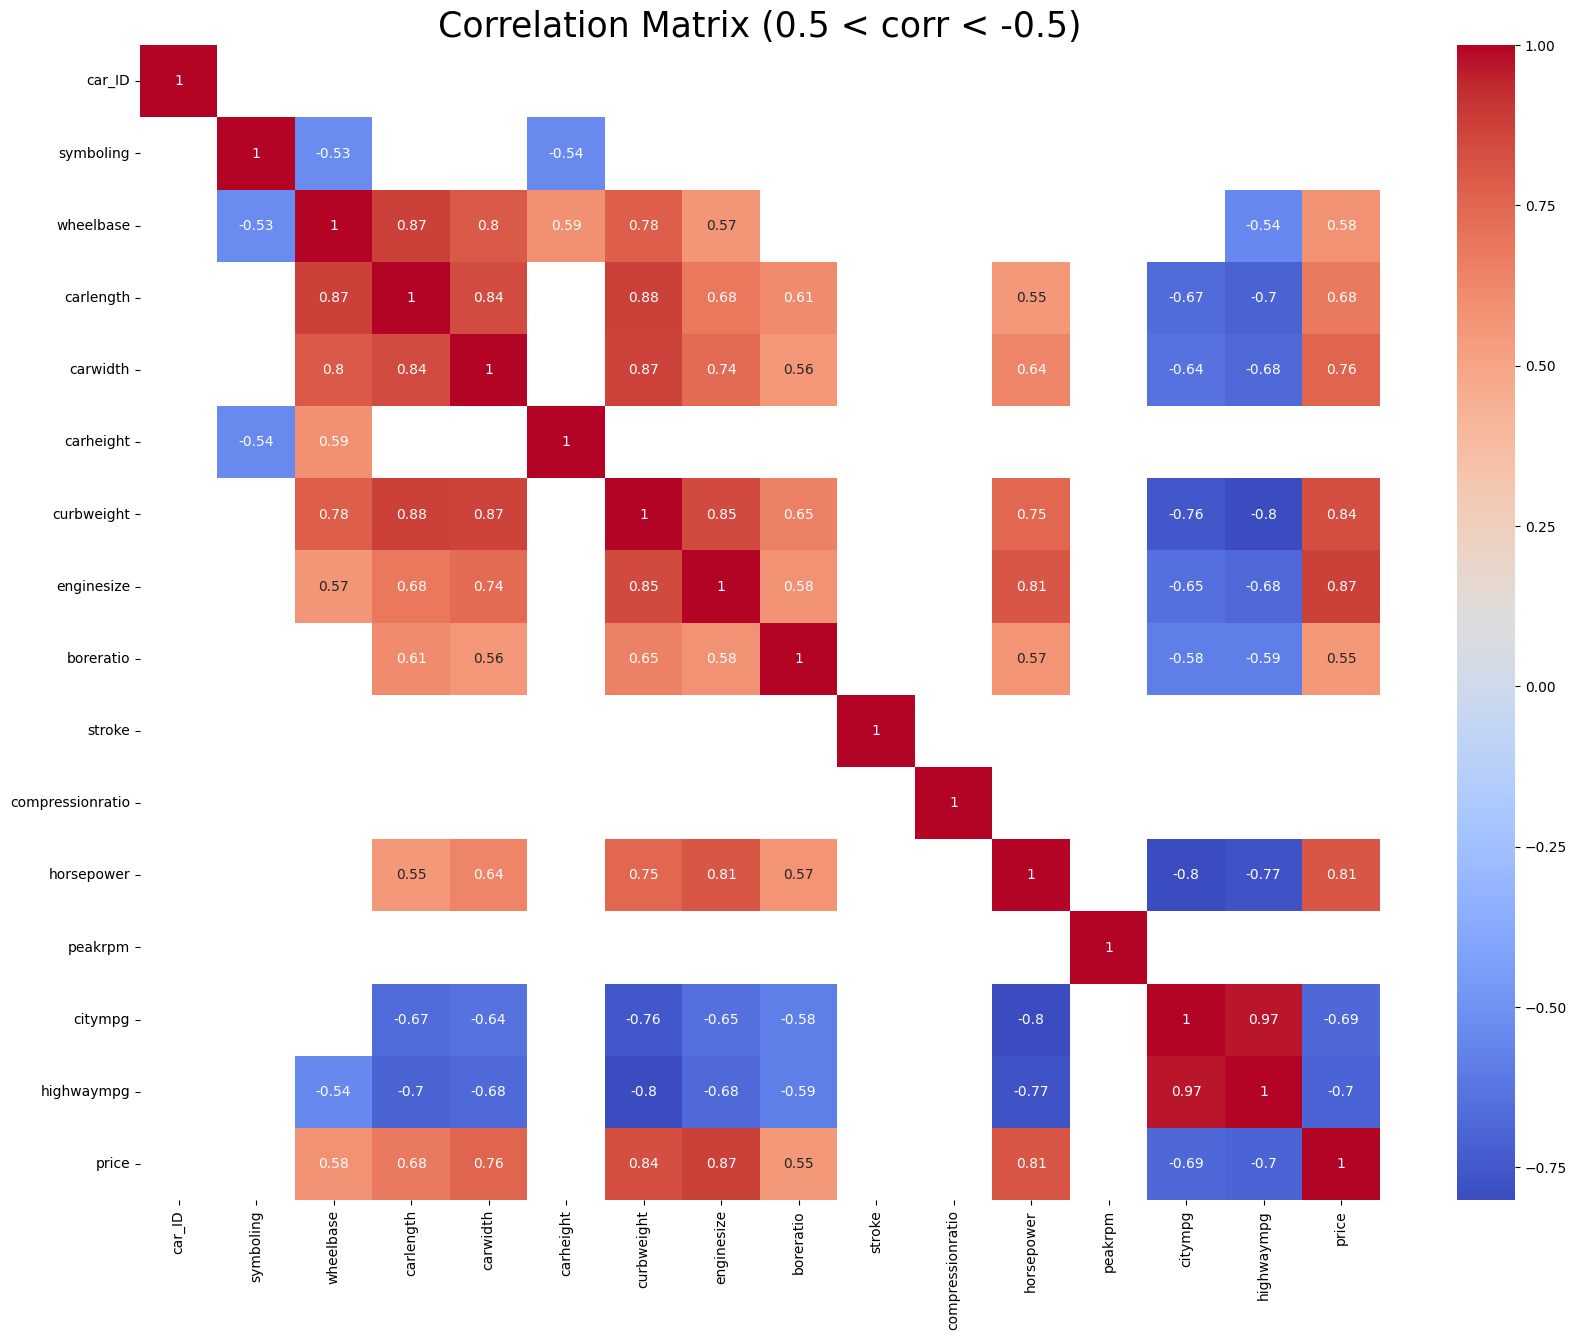

In [44]:
correlation_matrix = df_car.corr(numeric_only=True)
mask = (correlation_matrix < 0.5) & (correlation_matrix > -0.5)
plt.figure(figsize = (20 , 15))
# Plot the heatmap with the masked values
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix (0.5 < corr < -0.5)', fontsize=25)
plt.show()

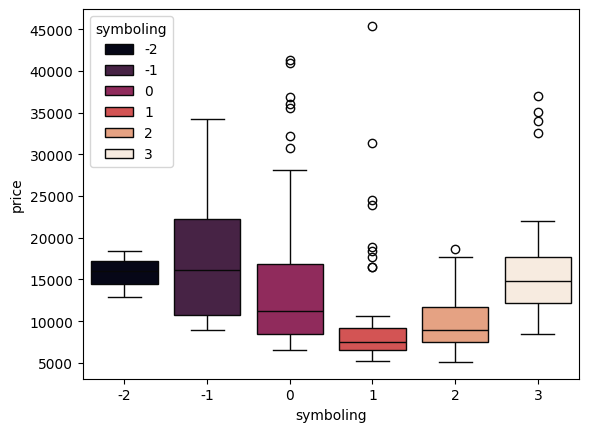

In [45]:
# Create the boxplot
sns.boxplot(x="symboling", y="price", data = df_car, hue="symboling", palette="rocket");

**there are outliers in "symboling" in [0 , 1 , 2 , 3]**
*  many people in symboling -2 between 14,500 to 17,000.
*  many people in symboling -1 between 10,800 to 22,000.
*  many people in symboling 0 between 9,000 to 17,000.
*  many people in symboling 1 between 6,800 to 9,000.
*  many people in symboling 2 between 7,500 to 11,500.
*  many people in symboling 3 between 12,000 to 18,800.

# Detected Outliers

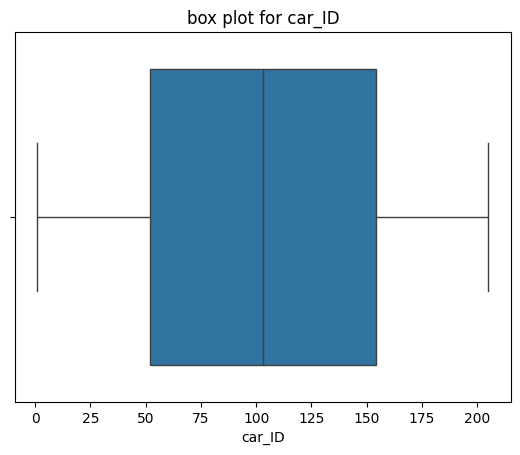

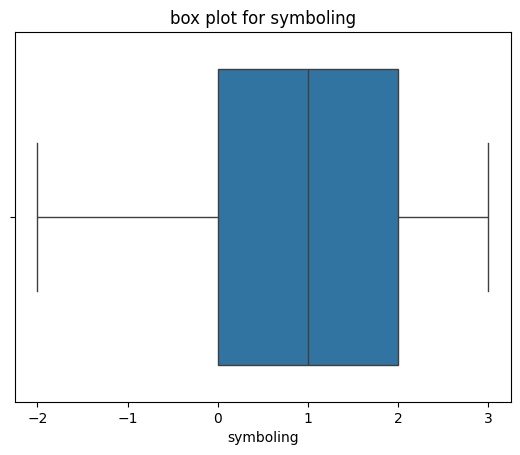

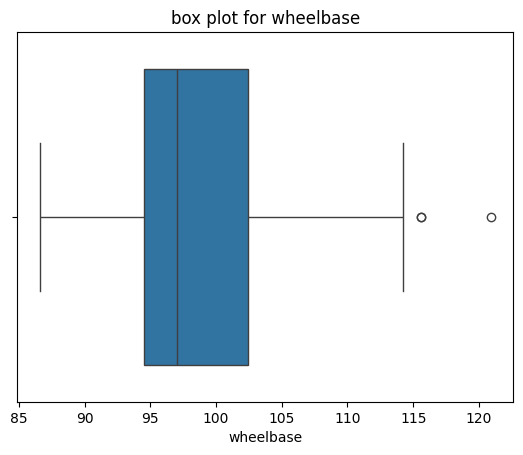

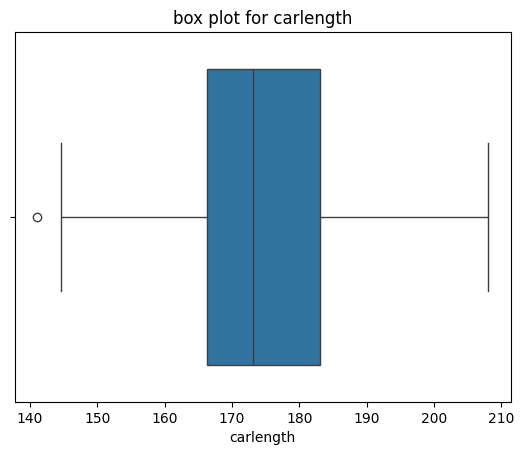

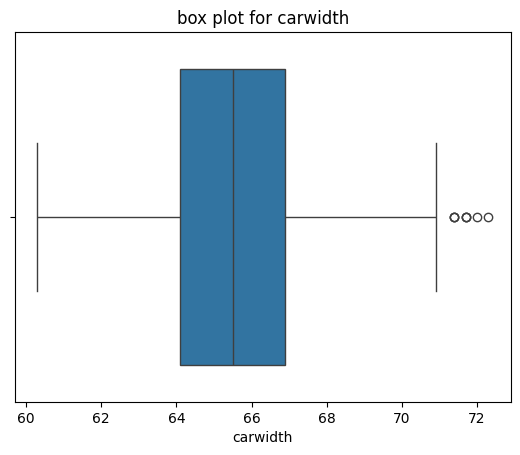

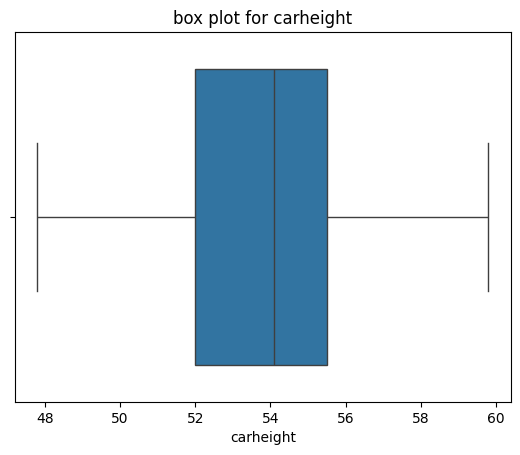

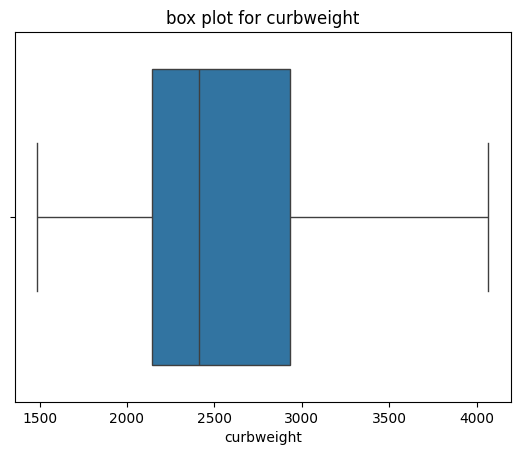

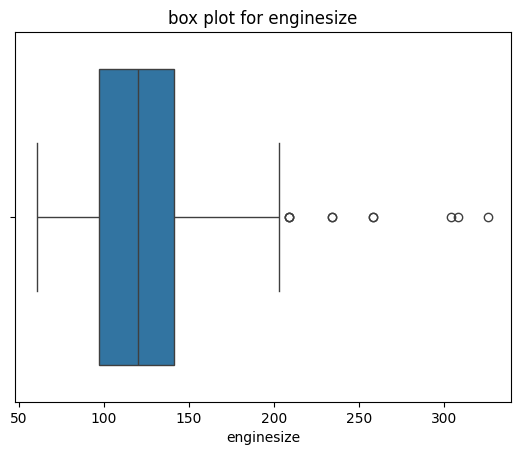

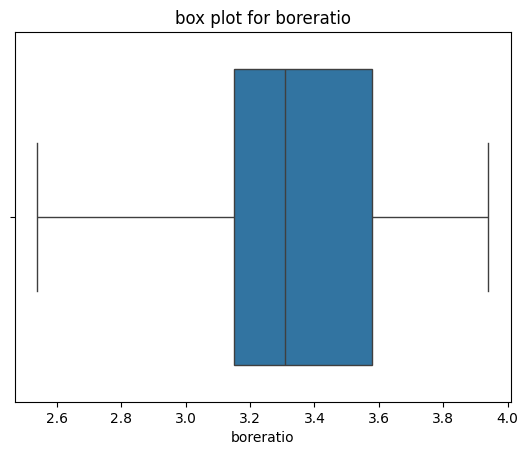

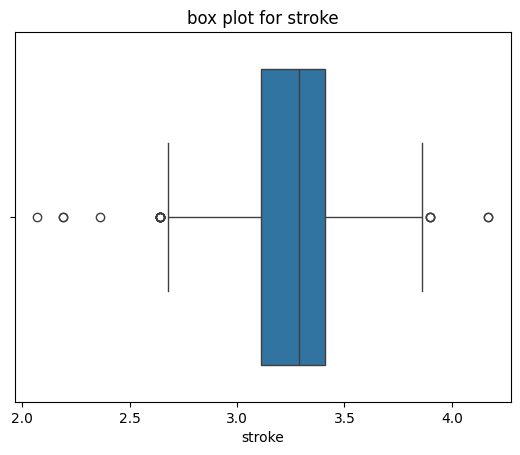

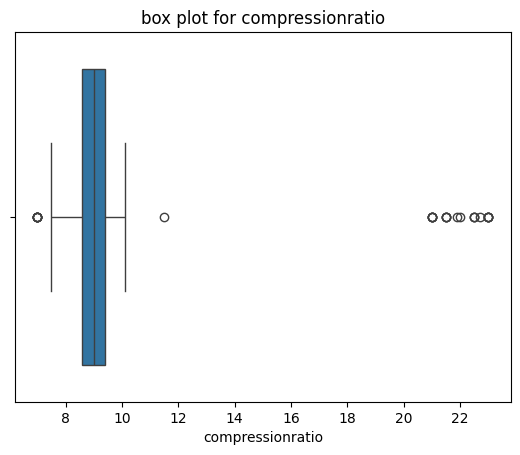

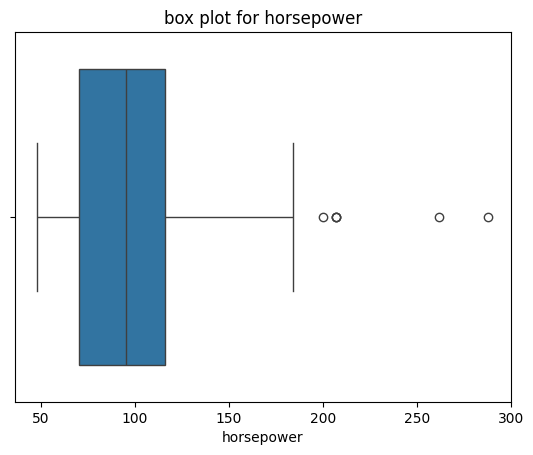

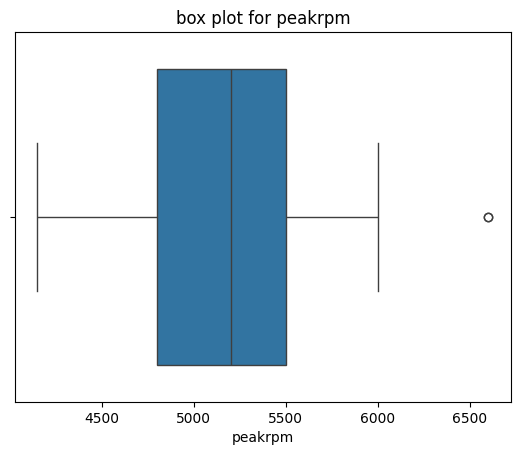

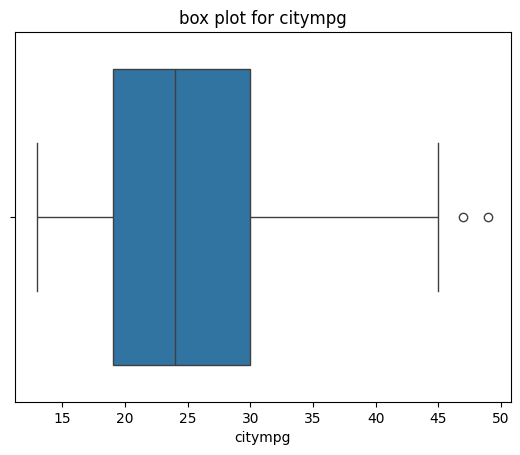

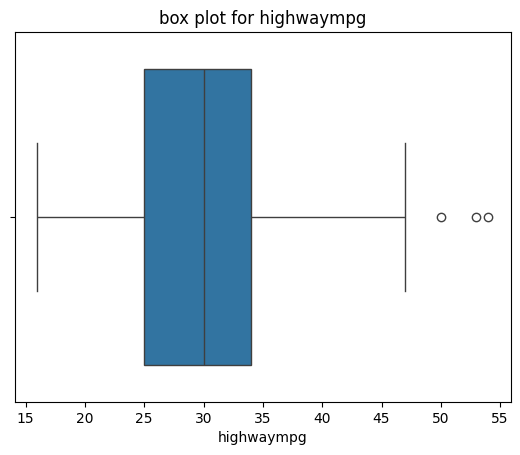

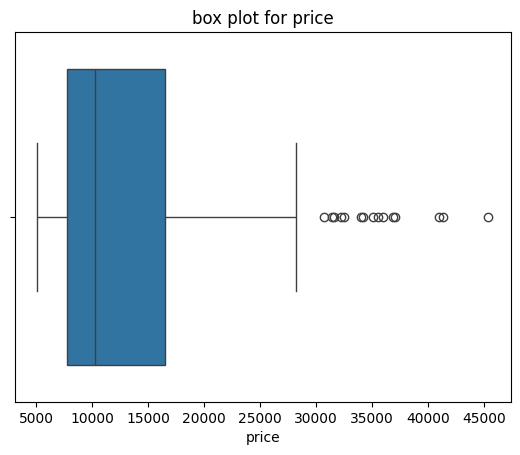

In [46]:
# making box plot for all numerical column
numeric_columns=df_car.select_dtypes(include=['number'])
for column in numeric_columns:
  sns.boxplot(x=numeric_columns[column])
  plt.title(f"box plot for {column}")
  plt.show()

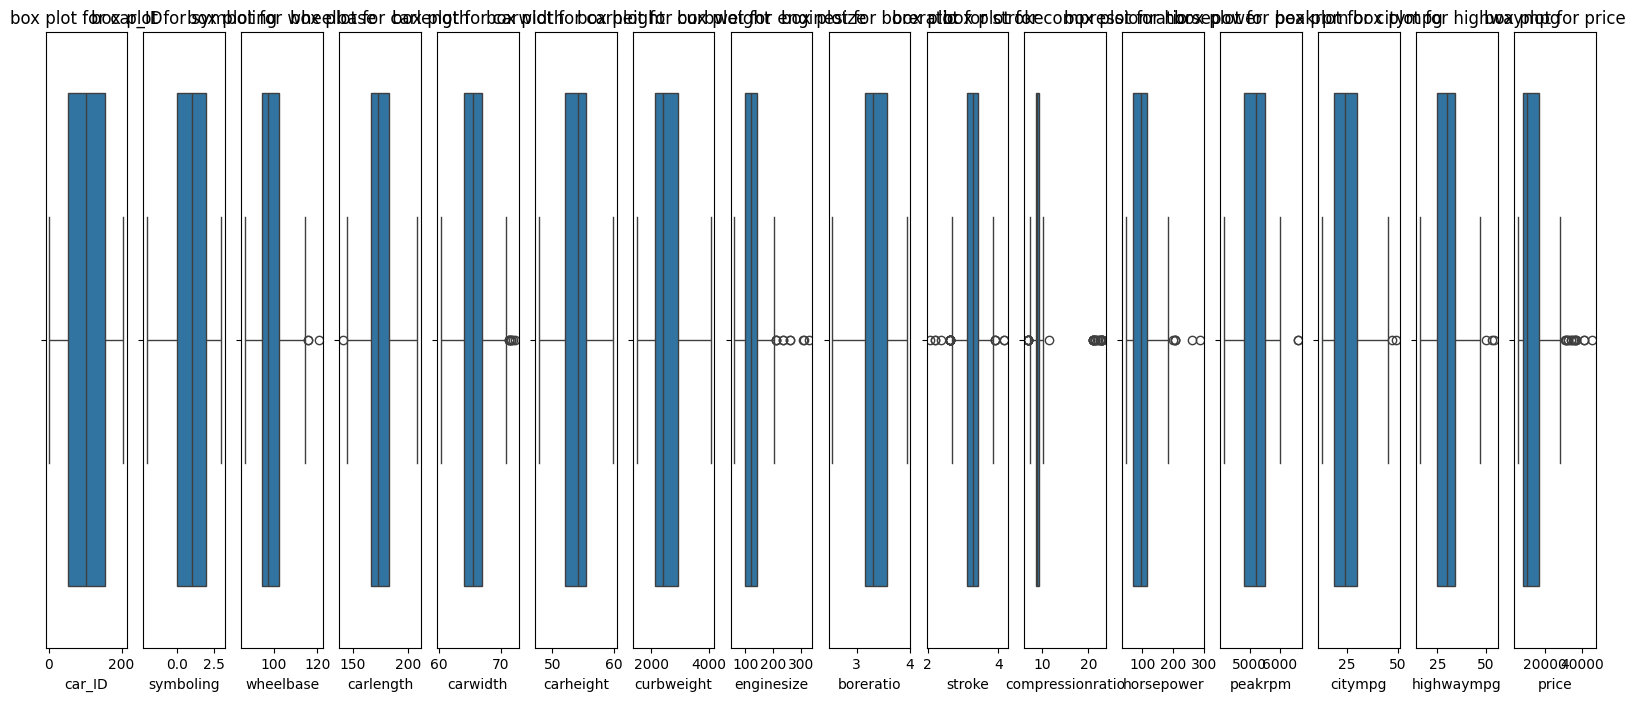

In [47]:
def boxplot_numeric_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include = ['number'])
    num_cols = len(numeric_columns.columns)
    plt.figure(figsize = (20 , 8))
    for i , column in enumerate(numeric_columns.columns):
        plt.subplot(1 , num_cols , i + 1)
        sns.boxplot(x = numeric_columns[column])
        plt.title(f'box plot for {column}')
boxplot_numeric_columns(df_car)

# 2) step 2 : Data preprocessing

# handling missing values

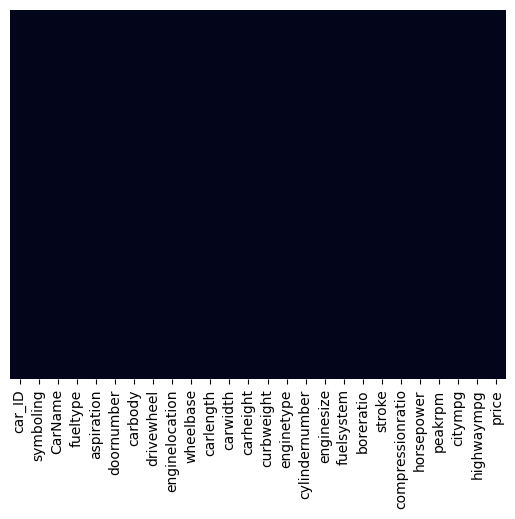

In [48]:
sns.heatmap(df_car.isnull() , yticklabels = False , cbar = False , cmap = "rocket");

**There is no any missing values here in our data**

# Duplicated values

In [49]:
df_car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [50]:
# drop the "CarName" columns then calculates the total number of duplicated rows .
df_car.drop(["CarName"],axis=1).duplicated().sum()
index = df_car[df_car.drop(["CarName"], axis=1).duplicated()].index

In [51]:
# drop the index column
df_car.drop(index , axis = 0)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [52]:
df_car.duplicated().sum()

0

# Outliers Detection

# (IQR)

In [53]:
q1 , q3 = df_car['price'].quantile([0.25 , 0.75])
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

In [54]:
outliers = df_car[(df_car['price'] > upper_limit) | (df_car['price'] < lower_limit)].index
outliers

Index([15, 16, 17, 47, 48, 49, 70, 71, 72, 73, 74, 126, 127, 128, 129], dtype='int64')

In [55]:
df_car.drop(outliers , axis = 0)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [56]:
def remove_outliers_iqr_countinuous(data , columns):
    for col in columns:
        if data[col].dtype != 'object':
           q1 , q3 = data[col].quantile([0.25 , 0.75])
           iqr = q3 - q1
           lower_limit , upper_limit = q1 - 1.5 * iqr , q3 + 1.5 * iqr
           filt=(data[col] < lower_limit) | (data[col] > upper_limit)
           data = data[~filt]
    return data.reset_index(drop = True)

In [57]:
df_car = remove_outliers_iqr_countinuous(df_car , ['compressionratio'])
df_car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
173,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
174,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
175,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


# (Z-score)

In [58]:
def remove_outliers_z_countinuous(data , upper_threshod = 3 , lower_threshold = -3):
    feature = data.select_dtypes(np.number).columns
    skewness = data[feature].skew()
    print(skewness)
    for column in feature:
        if -0.5 <= skewness[column] <= 0.5 :
           z_scores = (data[column] - data[column].mean()) / data[column].std()
           outliers =(z_scores < lower_threshold ) | (z_scores > upper_limit)
           data = data[~outliers]
    return data.reset_index(drop = True)

In [59]:
remove_outliers_z_countinuous(df_car)

car_ID             -0.006686
symboling           0.118733
wheelbase           1.177045
carlength           0.195733
carwidth            1.083902
carheight           0.175698
curbweight          0.792557
enginesize          1.948105
boreratio           0.115669
stroke             -0.754746
compressionratio   -0.803530
horsepower          1.427094
peakrpm             0.147985
citympg             0.685652
highwaympg          0.454692
price               1.967340
dtype: float64


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
173,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
174,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
175,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


# skewness

In [60]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [61]:
def skewness_log_square(data , numbers_of_cat_value):
  features = data.select_dtypes(np.number).columns
  for feature in features:
      if data[feature].nunique() <= numbers_of_cat_value:
          print(f"Categorical featuers {feature}")
          continue

      skewness = data[feature].skew()
      if skewness  > 0.5 :
        transformation = np.log1p
        transformation_name = "log"
      elif skewness < -0.5 :
        transformation = np.square
        transformation_name = "square"
      else :
        print(f"Normal distibution {feature}")
        continue

      logTr = ColumnTransformer(transformers = [(transformation_name.lower(), FunctionTransformer(transformation),[feature])])
      plt.figure(figsize=(15,6))
      plt.subplot(1,2,1)
      plt.title(f"distribution of {feature} before transformation" , fontsize = 15 )
      sns.histplot(data[feature], kde = True , color = "green")
      plt.subplot(1,2,2)

      df_transformed = pd.DataFrame(logTr.fit_transform(data))
      plt.title(f"Distribution of {feature} after transformation" , fontsize = 15)
      sns.histplot(df_transformed, bins = 20 , kde = True ,legend = False)
      plt.xlabel(feature)
      plt.show()

      print(f"Skewness was {round(data[feature].skew(), 5)} before & is {round(df_transformed[0].skew())} after log transformation. ")
      data[feature] = df_transformed[0]
  return data

Normal distibution car_ID
Categorical featuers symboling


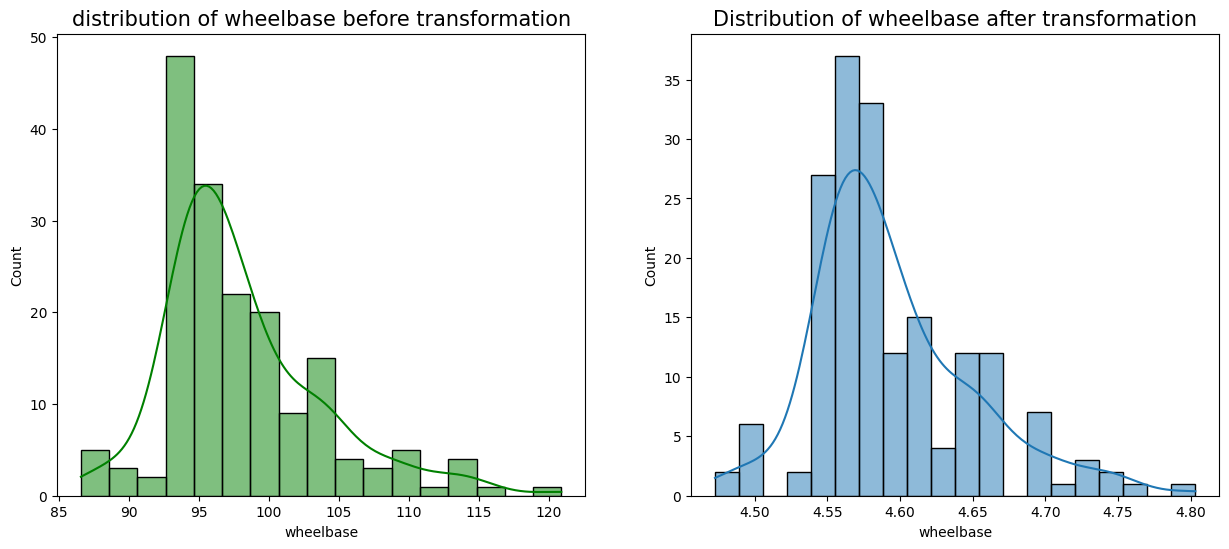

Skewness was 1.17704 before & is 1 after log transformation. 
Normal distibution carlength


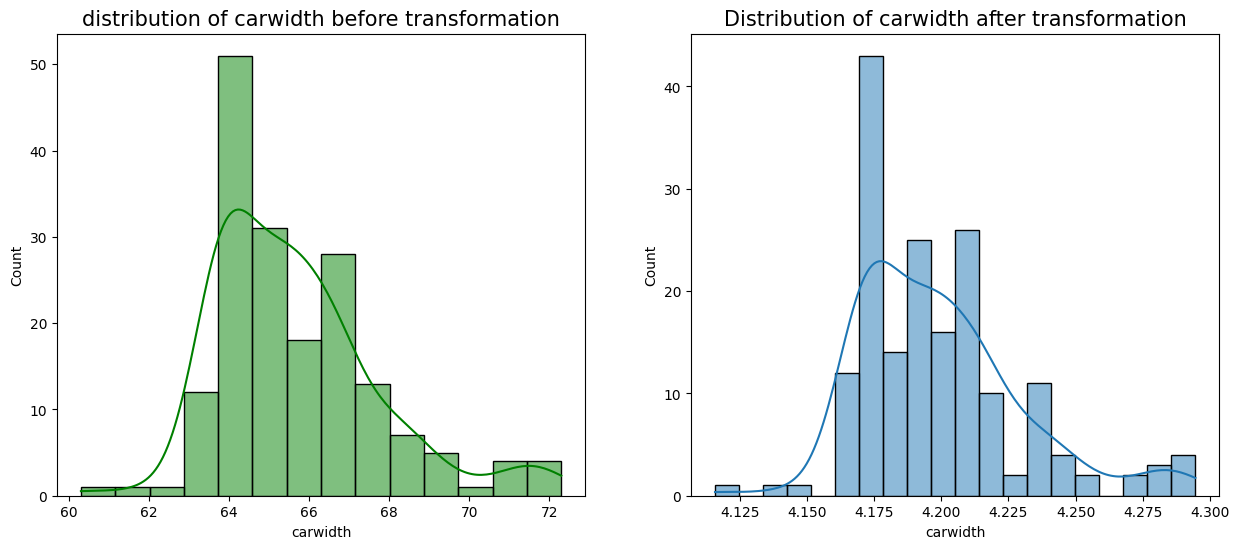

Skewness was 1.0839 before & is 1 after log transformation. 
Normal distibution carheight


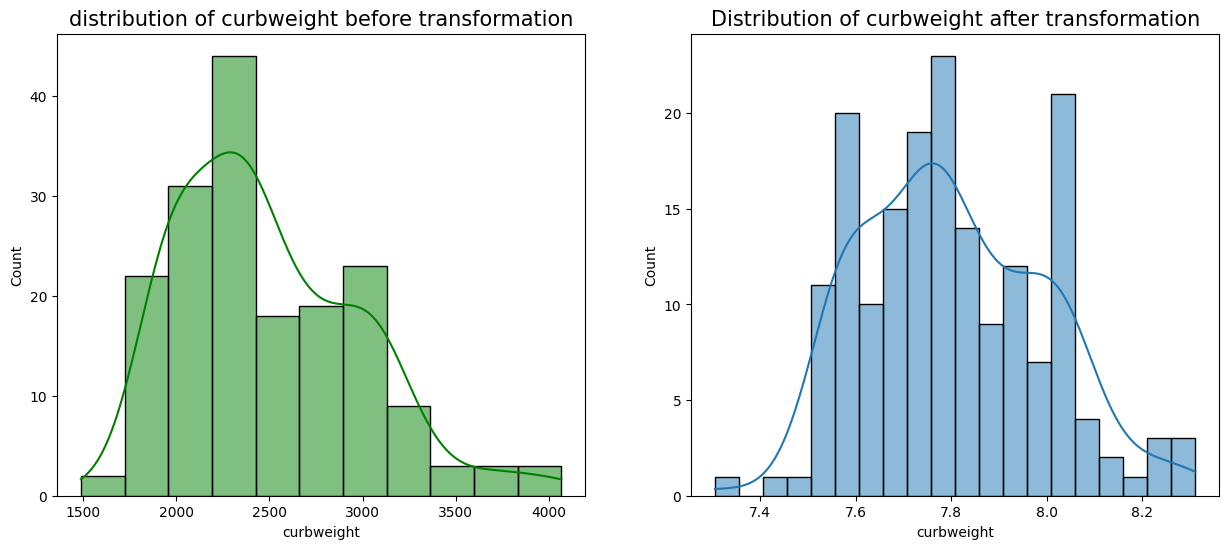

Skewness was 0.79256 before & is 0 after log transformation. 


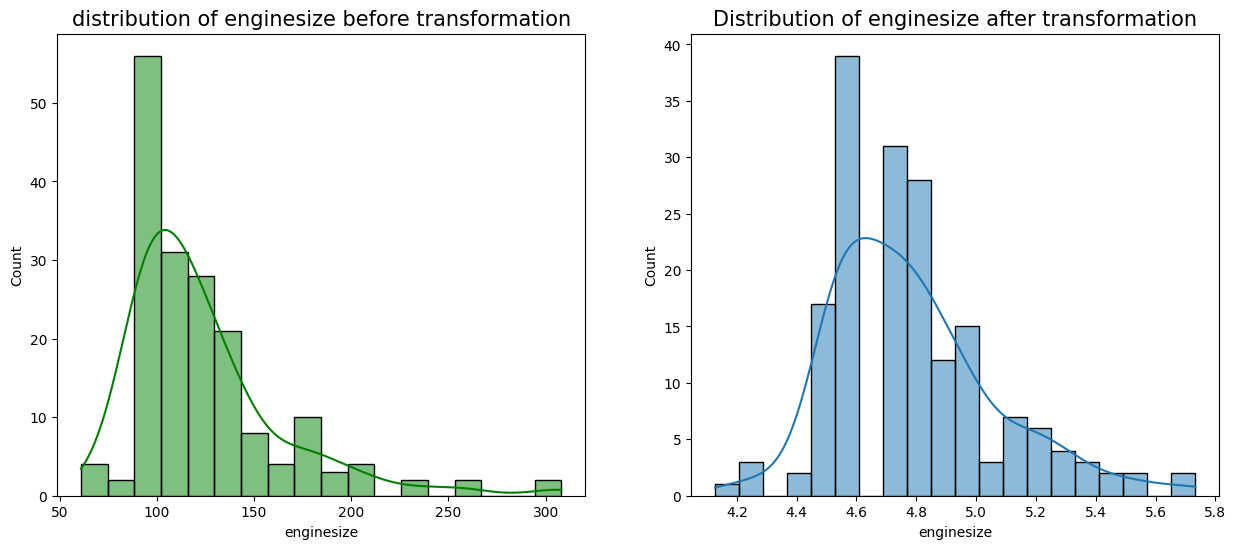

Skewness was 1.9481 before & is 1 after log transformation. 
Normal distibution boreratio


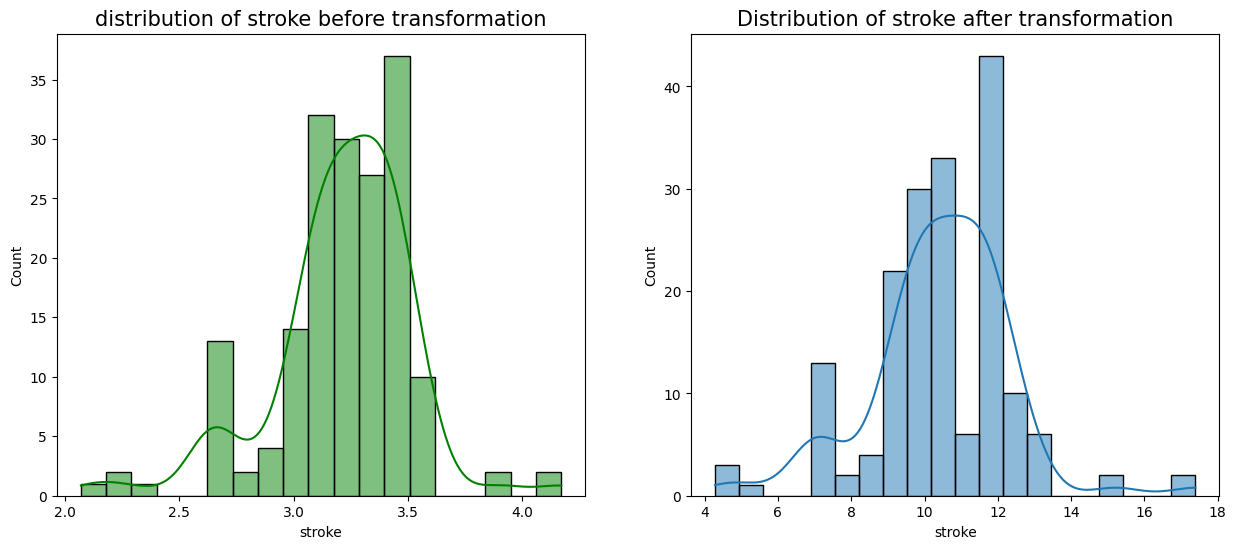

Skewness was -0.75475 before & is 0 after log transformation. 


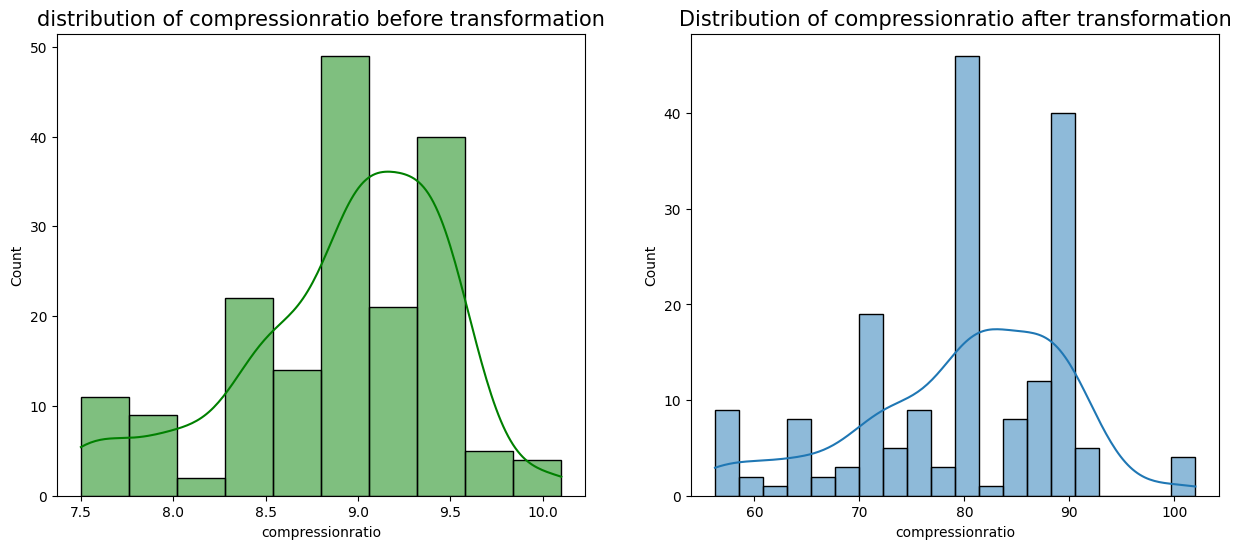

Skewness was -0.80353 before & is -1 after log transformation. 


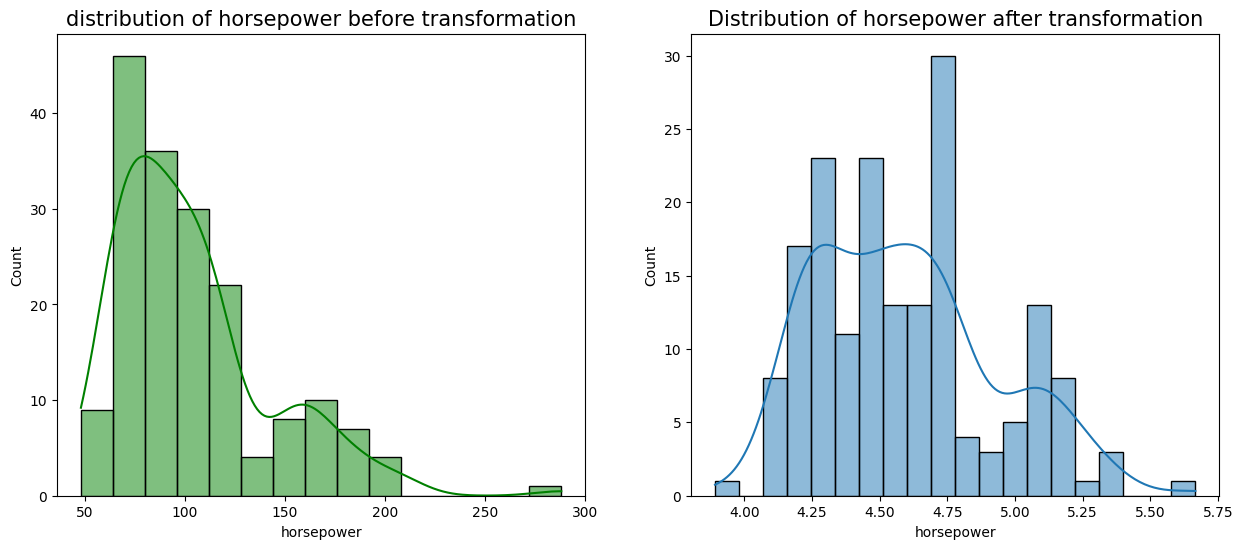

Skewness was 1.42709 before & is 1 after log transformation. 
Normal distibution peakrpm


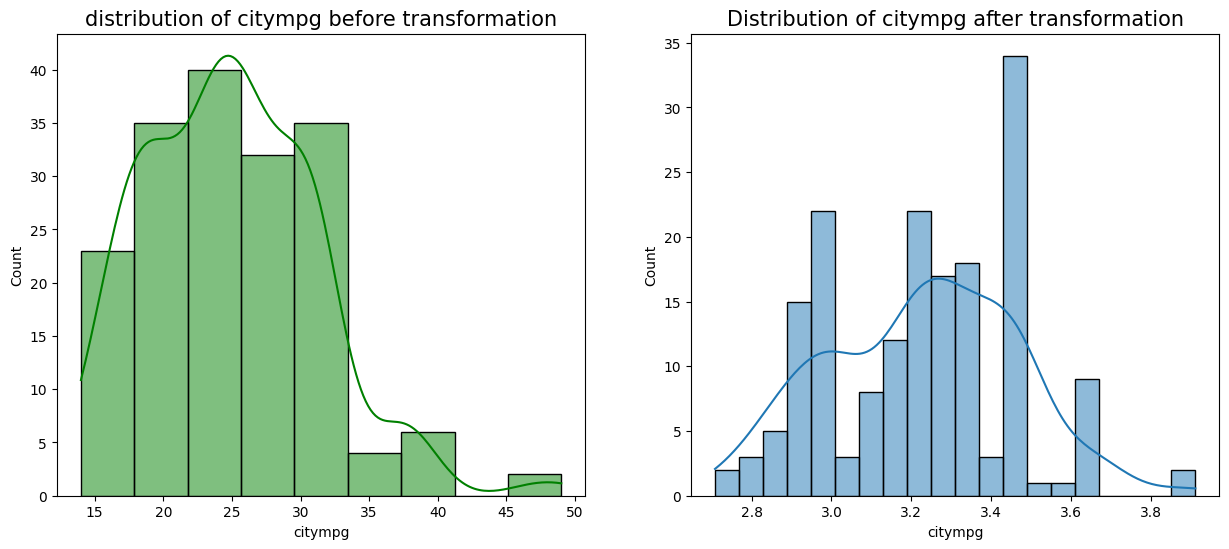

Skewness was 0.68565 before & is 0 after log transformation. 
Normal distibution highwaympg


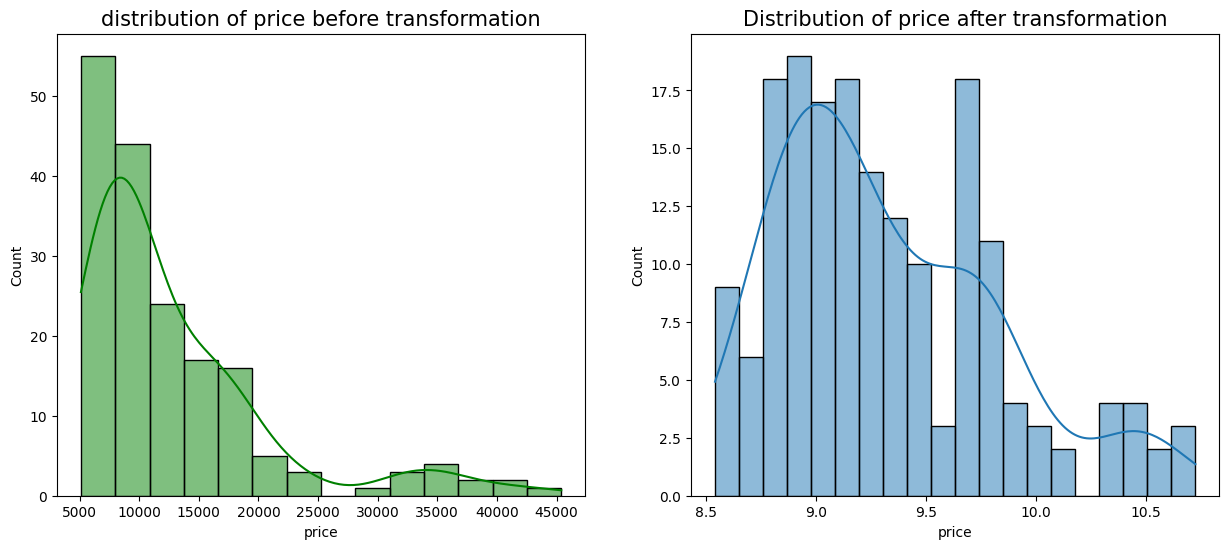

Skewness was 1.96734 before & is 1 after log transformation. 


In [62]:
df_train = skewness_log_square(df_car , 10)

# Removing Irrelevant Columns

In [63]:
pd.set_option("display.max_columns" , None)

In [64]:
df_car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [65]:
#This code was working before I did run all, but when I did run all, the results differed in the data science part
df_car.drop(["car_ID" , "CarName"] , axis = 1 , inplace = True)

In [66]:
df_car

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,4.495355,168.8,4.175925,48.8,7.843456,dohc,four,4.875197,mpfi,3.47,7.1824,81.00,4.718499,5000,3.091042,27,9.510149
1,3,gas,std,two,convertible,rwd,front,4.495355,168.8,4.175925,48.8,7.843456,dohc,four,4.875197,mpfi,3.47,7.1824,81.00,4.718499,5000,3.091042,27,9.711176
2,1,gas,std,two,hatchback,rwd,front,4.559126,171.2,4.197202,52.4,7.945910,ohcv,six,5.030438,mpfi,2.68,12.0409,81.00,5.043425,5000,2.995732,26,9.711176
3,2,gas,std,four,sedan,fwd,front,4.613138,176.6,4.207673,54.3,7.757051,ohc,four,4.700480,mpfi,3.19,11.5600,100.00,4.634729,5500,3.218876,30,9.543306
4,2,gas,std,four,sedan,4wd,front,4.609162,176.6,4.210645,54.3,7.946264,ohc,five,4.919981,mpfi,3.19,11.5600,64.00,4.753590,5500,2.944439,22,9.767152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,-1,gas,turbo,four,wagon,rwd,front,4.656813,188.8,4.222445,57.5,8.057694,ohc,four,4.875197,mpfi,3.62,9.9225,56.25,5.093750,5100,2.890372,22,9.849612
173,-1,gas,std,four,sedan,rwd,front,4.701389,188.8,4.247066,55.5,7.990577,ohc,four,4.955827,mpfi,3.78,9.9225,90.25,4.744932,5400,3.178054,28,9.731869
174,-1,gas,turbo,four,sedan,rwd,front,4.701389,188.8,4.245634,55.5,8.022897,ohc,four,4.955827,mpfi,3.78,9.9225,75.69,5.081404,5300,2.995732,25,9.854612
175,-1,gas,std,four,sedan,rwd,front,4.701389,188.8,4.247066,55.5,8.010692,ohcv,six,5.159055,mpfi,3.58,8.2369,77.44,4.905275,5500,2.944439,23,9.975157


# Encoding Categorical columns

**we will use One-Hot or Dummy Encoder with ['fueltype','aspiration','doornumber','drivewheel','enginelocation','enginetype','fuelsystem'] but i'll use One-Hot Encoder, and Ordinal Encoder with ['cylindernumber']**

In [67]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         177 non-null    int64  
 1   fueltype          177 non-null    object 
 2   aspiration        177 non-null    object 
 3   doornumber        177 non-null    object 
 4   carbody           177 non-null    object 
 5   drivewheel        177 non-null    object 
 6   enginelocation    177 non-null    object 
 7   wheelbase         177 non-null    float64
 8   carlength         177 non-null    float64
 9   carwidth          177 non-null    float64
 10  carheight         177 non-null    float64
 11  curbweight        177 non-null    float64
 12  enginetype        177 non-null    object 
 13  cylindernumber    177 non-null    object 
 14  enginesize        177 non-null    float64
 15  fuelsystem        177 non-null    object 
 16  boreratio         177 non-null    float64
 1

In [68]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Initialize encoders for each column
one_hot_encoders = {
    'fueltype': OneHotEncoder(sparse=False),
    'aspiration': OneHotEncoder(sparse=False),
    'doornumber': OneHotEncoder(sparse=False),
    'carbody': OneHotEncoder(sparse=False),
    'drivewheel': OneHotEncoder(sparse=False),
    'enginelocation': OneHotEncoder(sparse=False),
    'enginetype': OneHotEncoder(sparse=False),
    'fuelsystem': OneHotEncoder(sparse=False)
                                       }

ordinal_encoder = OrdinalEncoder()

# Iterate through each column and apply appropriate encoder
for col in df_car.columns:
    if col in one_hot_encoders:
        # Use OneHotEncoder for columns suitable for one-hot encoding
        df_encoded = pd.DataFrame(
            one_hot_encoders[col].fit_transform(df_car[[col]]),
            columns=one_hot_encoders[col].get_feature_names_out([col])
        )
        df_car = pd.concat([df_car, df_encoded], axis=1)
        df_car.drop(col, axis=1, inplace=True)
    elif col == 'cylindernumber':
        # Use OrdinalEncoder for the 'cylindernumber' column
        df_car[col] = ordinal_encoder.fit_transform(df_car[[col]])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [69]:
# Display the modified DataFrame with encoded columns
df_car

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,4.495355,168.8,4.175925,48.8,7.843456,2.0,4.875197,3.47,7.1824,81.00,4.718499,5000,3.091042,27,9.510149,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,4.495355,168.8,4.175925,48.8,7.843456,2.0,4.875197,3.47,7.1824,81.00,4.718499,5000,3.091042,27,9.711176,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,4.559126,171.2,4.197202,52.4,7.945910,3.0,5.030438,2.68,12.0409,81.00,5.043425,5000,2.995732,26,9.711176,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,4.613138,176.6,4.207673,54.3,7.757051,2.0,4.700480,3.19,11.5600,100.00,4.634729,5500,3.218876,30,9.543306,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,4.609162,176.6,4.210645,54.3,7.946264,1.0,4.919981,3.19,11.5600,64.00,4.753590,5500,2.944439,22,9.767152,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,-1,4.656813,188.8,4.222445,57.5,8.057694,2.0,4.875197,3.62,9.9225,56.25,5.093750,5100,2.890372,22,9.849612,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
173,-1,4.701389,188.8,4.247066,55.5,7.990577,2.0,4.955827,3.78,9.9225,90.25,4.744932,5400,3.178054,28,9.731869,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
174,-1,4.701389,188.8,4.245634,55.5,8.022897,2.0,4.955827,3.78,9.9225,75.69,5.081404,5300,2.995732,25,9.854612,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175,-1,4.701389,188.8,4.247066,55.5,8.010692,3.0,5.159055,3.58,8.2369,77.44,4.905275,5500,2.944439,23,9.975157,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Machine Learning Part

# Linear Regression

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
df_car.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [72]:
#This code was working before I did run all, but when I did run all, the results differed in the data science part
#x = df_car[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_0.0', 'aspiration_0.0', 'aspiration_1.0','doornumber_0.0', 'doornumber_1.0', 'carbody_0.0', 'carbody_1.0', 'carbody_2.0', 'carbody_3.0', 'carbody_4.0', 'drivewheel_0.0','drivewheel_1.0', 'drivewheel_2.0', 'enginelocation_0.0','enginelocation_1.0', 'enginetype_0.0', 'enginetype_1.0','enginetype_2.0', 'enginetype_3.0', 'enginetype_4.0', 'enginetype_5.0','enginetype_6.0', 'fuelsystem_0.0', 'fuelsystem_1.0', 'fuelsystem_2.0','fuelsystem_3.0', 'fuelsystem_4.0', 'fuelsystem_5.0']]

#this is the new code with new names for the columns
x = df_car[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi']]
# x = df_car.drop(columns = ['price])


#this is our target "y"
y = df_car['price']

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.4 , random_state = 5)

In [75]:
x_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
138,0,4.571613,166.3,4.180522,53.0,7.647309,2.0,4.595120,3.19,9.1809,81.00,4.262680,4800,3.663562,47,8.954028,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
107,3,4.505350,168.9,4.189655,51.6,7.921898,3.0,5.273000,3.74,8.4100,90.25,5.337538,5900,2.890372,25,10.434968,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
171,-2,4.656813,188.8,4.222445,56.2,8.021585,2.0,4.875197,3.62,9.9225,56.25,5.093750,5100,2.890372,22,9.821247,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72,3,4.577799,173.0,4.195697,49.4,7.753194,2.0,4.812184,3.35,11.9716,72.25,4.488636,5000,3.258097,32,9.047821,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49,1,4.544358,159.1,4.177459,54.1,7.552762,2.0,4.521789,3.03,9.9225,81.00,4.234107,5000,3.465736,38,8.824089,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,1,4.670958,192.7,4.282206,55.9,8.034955,1.0,4.882802,3.13,11.5600,68.89,4.948760,5500,2.890372,20,10.080629,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
73,1,4.577799,172.4,4.195697,51.6,7.768956,2.0,4.812184,3.35,11.9716,72.25,4.488636,5000,3.258097,32,8.852236,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
144,1,4.559126,168.7,4.174387,52.6,7.741099,2.0,4.595120,3.24,9.4864,88.36,4.727388,6600,3.295837,29,9.163144,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
118,2,4.550714,156.9,4.165114,53.7,7.626083,2.0,4.584967,3.62,5.5696,81.00,4.248495,4900,3.465736,36,8.540714,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [76]:
y_train

138     8.954028
107    10.434968
171     9.821247
72      9.047821
49      8.824089
         ...    
8      10.080629
73      8.852236
144     9.163144
118     8.540714
99      8.625689
Name: price, Length: 106, dtype: float64

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
# making the object
lm = LinearRegression()

In [79]:
# fit the model
lm.fit(x_train , y_train)

LinearRegression()

In [80]:
# ceta zero
lm.intercept_

2.7391422463551862e-12

In [81]:
# These numbers are the numbers of the features we have in x
lm.coef_

array([-1.19521583e-14, -2.80867831e-13,  1.39721114e-15, -2.74332605e-14,
       -4.80527411e-15,  6.00852452e-14, -1.86675730e-14,  1.24171774e-13,
       -9.97825073e-14, -9.42164101e-16,  2.58162322e-15, -6.68077053e-14,
        6.01025076e-18, -4.47207000e-13,  1.01894889e-14,  1.00000000e+00,
        1.11022302e-16, -3.53239880e-14,  3.55372043e-14, -7.68452199e-15,
        7.89962770e-15, -4.14413831e-14,  4.07507269e-14, -2.24587830e-15,
       -5.41986680e-15,  7.21920779e-15,  4.04467620e-14, -2.17332195e-14,
       -1.83654336e-14,  6.04034405e-14, -6.03002245e-14,  5.15112766e-14,
       -2.63528930e-13,  5.83322541e-14,  4.62464631e-14,  1.08838686e-13,
        1.02350509e-14, -1.13522664e-14,  3.34544137e-14, -2.65445265e-14,
       -1.13802388e-14,  2.07419768e-14, -2.29182193e-14,  5.59237743e-15])

In [82]:
coeff_df = pd.DataFrame(lm.coef_ , x.columns , columns = ['coefficient'])
coeff_df

,coefficient
symboling,-1.195216e-14
wheelbase,-2.808678e-13
carlength,1.397211e-15
carwidth,-2.743326e-14
carheight,-4.805274e-15
curbweight,6.008525e-14
cylindernumber,-1.866757e-14
enginesize,1.241718e-13
boreratio,-9.978251e-14
stroke,-9.421641e-16


In [83]:
predictions = lm.predict(x_test)

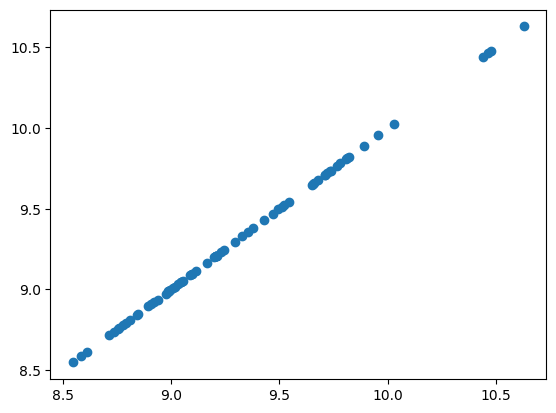

In [84]:
plt.scatter(y_test , predictions);

**another way to predict**

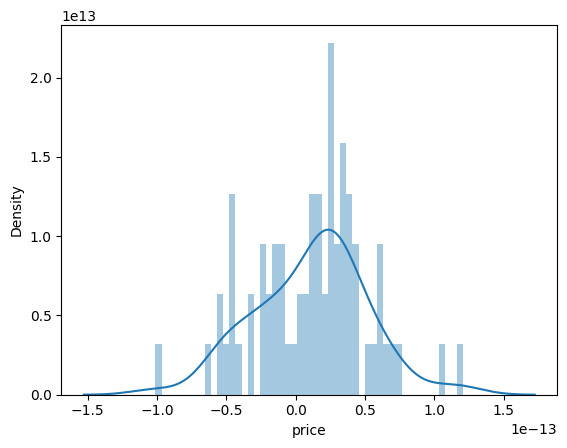

In [85]:
sns.distplot((y_test - predictions) , bins = 50);

In [86]:
# to calculat mean square error
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [87]:
print('MSE :' ,mean_squared_error(y_test , predictions))

MSE : 1.7264720893025716e-27


In [88]:
# if we going to compare this number with train
predictions_train = lm.predict(x_train)

In [89]:
print('MSE :' ,mean_squared_error(y_train , predictions_train))

MSE : 2.009481756454309e-27


In [90]:
# to get the score for test
lm.score(x_test , y_test )

1.0

In [91]:
# to get the score for train
lm.score(x_train , y_train )

1.0

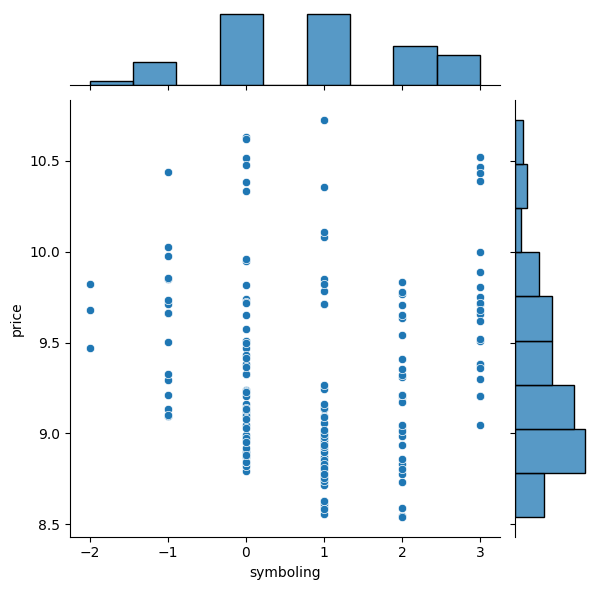

In [92]:
sns.jointplot(x = "symboling" , y = "price" , data = df_car);

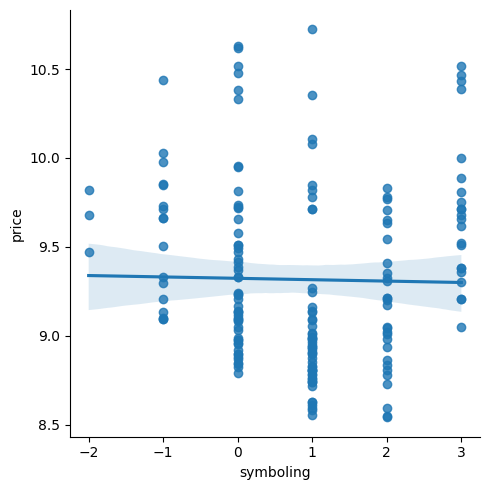

In [93]:
#this is the best fit line in our model
sns.lmplot(x = "symboling" , y = "price" , data = df_car);

In [94]:
x = df_car.drop(columns = ["price"])
y = df_car["price"]

# Eplination and analysis

# spliting data into training and testing sets :

In [126]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 42)

In [96]:
x_train.shape

(132, 43)

# Polynomial Regression Model:

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

In [98]:
# Create polynomial features with degree = 3
poly = PolynomialFeatures(degree = 3)
# Initialize Linear Regression model
lin = LinearRegression()

In [129]:
# Transform training and testing features to polynomial features
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [100]:
x_train_poly.shape

(132, 15180)

# Fitting and Predicting with Polynomial Regression:

In [130]:
# Fit the linear regression model on the polynomial features of the training set
lin.fit(x_train_poly , y_train)

LinearRegression()

In [131]:
# Predict target values for training and testing sets
y_pred_train = lin.predict(x_train_poly)
y_pred_test = lin.predict(x_test_poly)

# Calculating Mean Absolute Error:

In [139]:
# Calculate mean absolute error for training set predictions
mean_absolute_error(y_train, y_pred_train)

0.006869148970131961

In [141]:
mae_train = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error (Training Set):", mae_train)

Mean Absolute Error (Training Set): 0.006869148970131961


In [138]:
# Calculate mean absolute error for testing set predictions
mean_absolute_error(y_test, y_pred_test)

1334.4138955127758

In [142]:
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (Testing Set):", mae_test)

Mean Absolute Error (Testing Set): 1334.4138955127758


**Create another polynominal by another degree**

In [150]:
poly_1 = PolynomialFeatures(degree = 1)
lin = LinearRegression()
x_train_poly = poly_1.fit_transform(x_train)
x_test_poly = poly_1.fit_transform(x_test)
lin.fit(x_train_poly , y_train)

LinearRegression()

In [151]:
y_pred_train = lin.predict(x_train_poly)
y_pred_test = lin.predict(x_test_poly)

In [152]:
mean_absolute_error(y_train, y_pred_train)

0.09086218346808662

In [153]:
mean_absolute_error(y_test, y_pred_test)

0.179464293246145

**this is the best degree for our model : ( degree = 1 )**